In [4]:
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [3]:
# import scarcity labeled ads
df = pd.read_csv('./data/scarcity_dataset.csv')
df

,ad,scarcity
0,it’s almost over the shortcut law that lets yo...,1
1,on sale this week sequel to nyt bestseller pro...,1
2,refugees are especially vulnerable to the dang...,1
3,we are motivating reminding and supporting vot...,1
4,the future of decentralized nomadic coliving i...,1
...,...,...
17995,parents take part in the study of the impact o...,0
17996,lincoln news lincoln mayor orders greater rest...,0
17997,joe biden beat the nra twice he got assault we...,0
17998,reid nearly lost his eye to cancer thanks to t...,0


In [5]:
X_train, X_test,  y_train, y_test = train_test_split(df['ad'], df['scarcity'], test_size =0.2, random_state=42)

In [6]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [7]:
# create and train the multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tf,y_train)

MultinomialNB()

accuracy:   0.788
              precision    recall  f1-score   support

 no-scarcity       0.90      0.65      0.75      1781
    scarcity       0.73      0.93      0.82      1819

    accuracy                           0.79      3600
   macro avg       0.81      0.79      0.78      3600
weighted avg       0.81      0.79      0.78      3600

confusion matrix:
[[1153  628]
 [ 135 1684]]



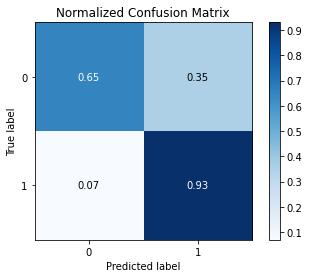

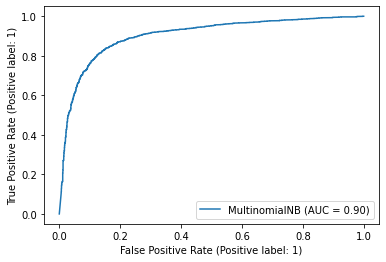

In [8]:
# make predictions
y_pred = clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, y_pred, target_names=['no scarcity', 'scarcity']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [9]:
df_val = pd.read_csv('./data/sample_scarcity.csv')
df_val

,ad,scarcity
0,See why everyone is celebrating at Hoblit Dodg...,0
1,Help give people without a home a chance to le...,0
2,I am so proud of what this grassroots team has...,0
3,We have until March 31st to raise money for ou...,1
4,Learn how to use the new staffing law to impro...,0
...,...,...
124,Blood donation saves lives!\r\nThis cannot be ...,0
125,"Over 10,000 Palestinians have been forced left...",1
126,"Palestine Emergency Appeal: 53 Palestinians, i...",1
127,Let's build Cameroon. Wake up Cameroonians and...,1


accuracy:   0.713
              precision    recall  f1-score   support

 no-scarcity       0.87      0.45      0.59        60
    scarcity       0.66      0.94      0.78        69

    accuracy                           0.71       129
   macro avg       0.77      0.70      0.69       129
weighted avg       0.76      0.71      0.69       129

confusion matrix:
[[27 33]
 [ 4 65]]



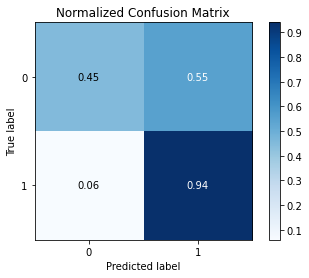

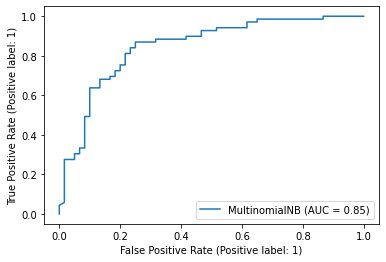

In [10]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['scarcity']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-scarcity', 'scarcity']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)